**TASK-2** Unsupervised ML using Kmeans Clustering 

In [67]:
library(tidyverse)
library(ggfortify)
library(stats)
library(NbClust)
library(WVPlots)

In [47]:
#Reading data from CSV file
df <- read_csv("../input/k-means-clustering/Iris.csv")
head(df)

Parsed with column specification:
cols(
  Id = col_double(),
  SepalLengthCm = col_double(),
  SepalWidthCm = col_double(),
  PetalLengthCm = col_double(),
  PetalWidthCm = col_double(),
  Species = col_character()
)



Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


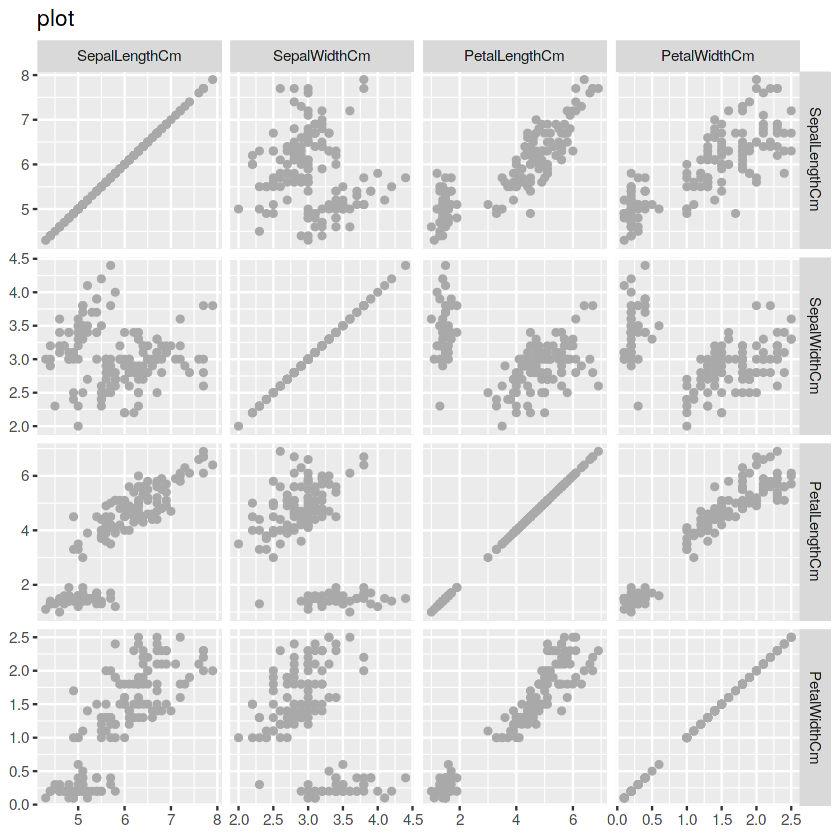

In [66]:
PairPlot(df, colnames(df)[2:5], "plot")

In [48]:
#Removing initial label of Species from original dataset 
x <- df[2:5]
head(x)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


*Predicting optimum number of clusters for K Means using **WSS** method*

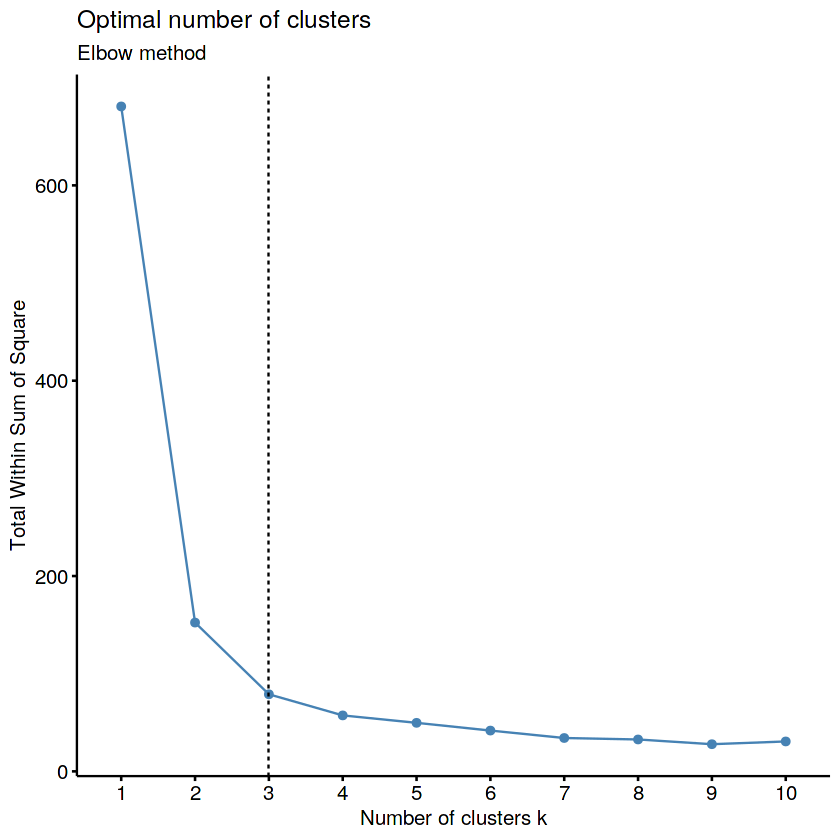

In [49]:
fviz_nbclust(x, kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method")

*We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration*

*From this we choose the number of clusters as 3*

*Fitting K-Means clustering Model to training dataset*

In [50]:
set.seed(1234)
km <- kmeans(x,centers=3)
aggregate(x, by=list(km$cluster), mean)

Group.1,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871
3,6.850000,3.073684,5.742105,2.071053


*Confusion **MATRIX** cm*

In [51]:

cm <- table(df$Species,km$cluster)
cm

                 
                   1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0 48  2
  Iris-virginica   0 14 36

So, 50 Setosa are correctly classified as Setosa. Out of 62 Versicolor, 48 Versicolor are correctly classified as Versicolor and 14 are classified as virginica. Out of 36 virginica, 19 virginica are correctly classified as virginica and 2 are classified as Versicolor.

*Model Evaluation and visualization*

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871
3,6.850000,3.073684,5.742105,2.071053


,SepalLengthCm,SepalWidthCm
1,5.006000,3.418000
2,5.901613,2.748387
3,6.850000,3.073684


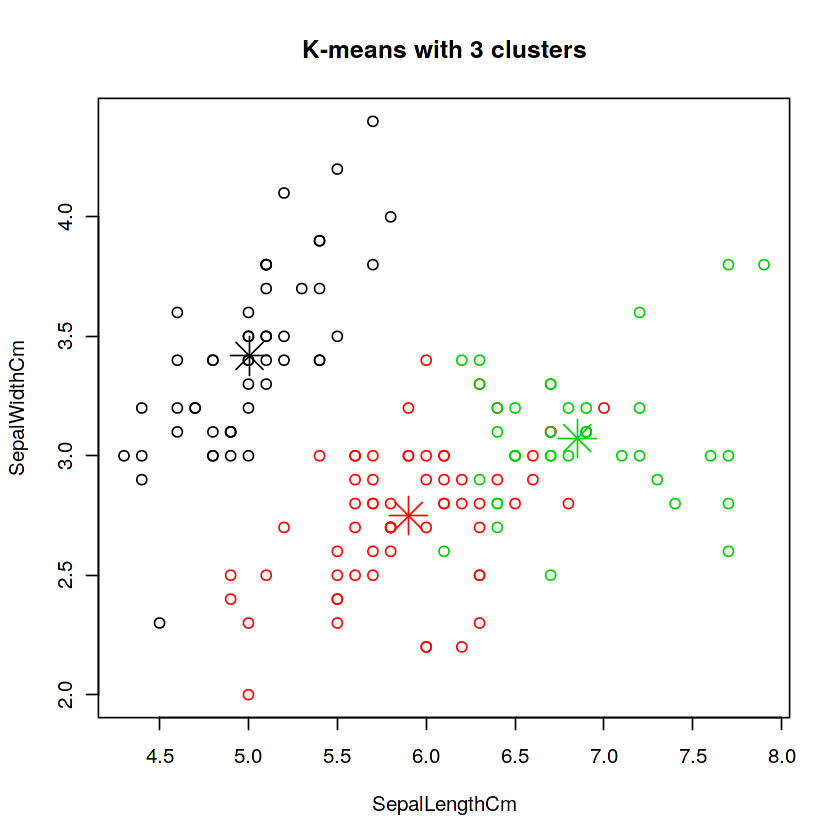

In [52]:
plot(df[c("SepalLengthCm", "SepalWidthCm")],col = km$cluster,main = "K-means with 3 clusters")
km$centers 
km$centers[, c("SepalLengthCm", "SepalWidthCm")]
## Ploting cluster centers
points(km$centers[, c("SepalLengthCm", "SepalWidthCm")],  
       col = 1:3, pch = 8, cex = 3)  

*Visualizing clusters*

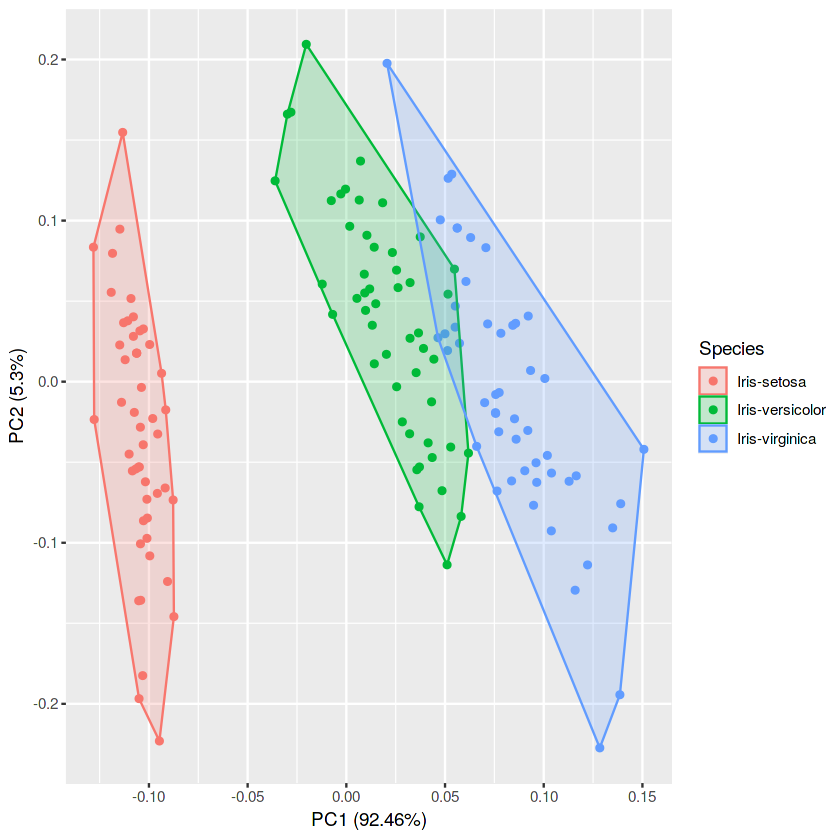

In [59]:
autoplot(km,df,frame=TRUE,colour="Species")